In [1]:
# Importing necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#import google drive package
from  google.colab import drive

In [51]:
#pip install fastai==1.0.60


In [3]:
from fastai.vision import *

In [4]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#save path to project folder 
root_path = 'gdrive/My Drive/Image_Classifier/'

In [6]:
# make balls folder 
from pathlib import Path

(Path(root_path)/'Balls').mkdir(parents=True, exist_ok=True)

In [7]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/Image_Classifier/Balls/'

In [8]:
#make folder names 
folders = ['golf','baseball','basketball','soccer','tennis','bowling','american_football','rugby','volleyball']

In [9]:
#create all folders in /Balls
for i in folders:
 path = Path(proj_path)
 dest = (path/i).mkdir(parents=True, exist_ok=True)

In [10]:
#save fastai path 
p_path = Path(proj_path)

In [11]:
from fastai.vision import ImageDataBunch, get_transforms, imagenet_stats

np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        size=224, bs=32).normalize(imagenet_stats)


In [12]:
data.classes

['american_football',
 'baseball',
 'basketball',
 'bowling',
 'golf',
 'rugby',
 'soccer',
 'tennis',
 'volleyball']

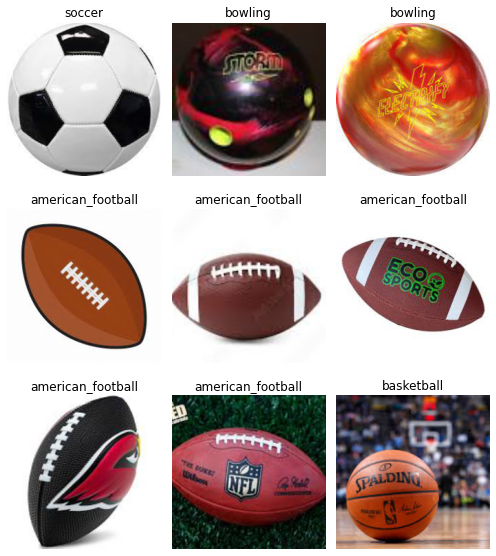

In [13]:
#SHowing a sample of the images collected 
data.show_batch(rows=3,figsize=(7,8))


In [14]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [15]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.148149,1.387507,0.421569,01:37
1,1.921486,0.843602,0.196078,01:24
2,1.294089,0.806274,0.176471,01:24
3,0.909289,0.844774,0.147059,01:24
4,0.667714,0.876101,0.186275,01:25
5,0.504662,0.903968,0.186275,01:25
6,0.384395,0.887569,0.166667,01:25
7,0.302978,0.888702,0.186275,01:24


In [16]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/Image_Classifier/Balls/models/model1_34.pth')

In [21]:

learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

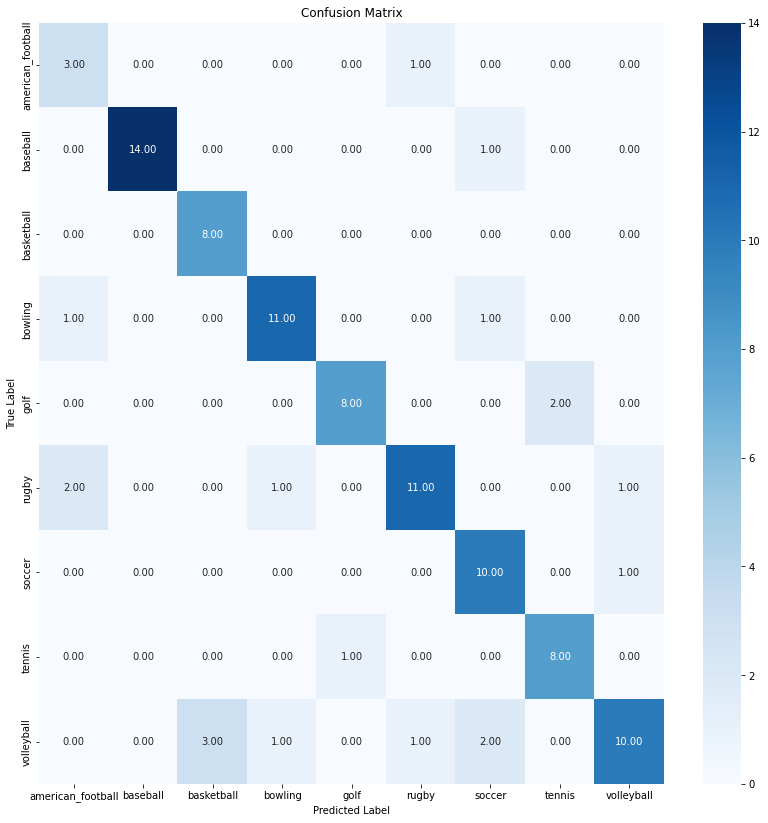

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues, figsize=(5,5)):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=figsize)  # increase plot size here
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(classes)
    ax.yaxis.set_ticklabels(classes)
    plt.show()


plot_confusion_matrix(interp.confusion_matrix(), interp.data.classes, figsize=(14,14))



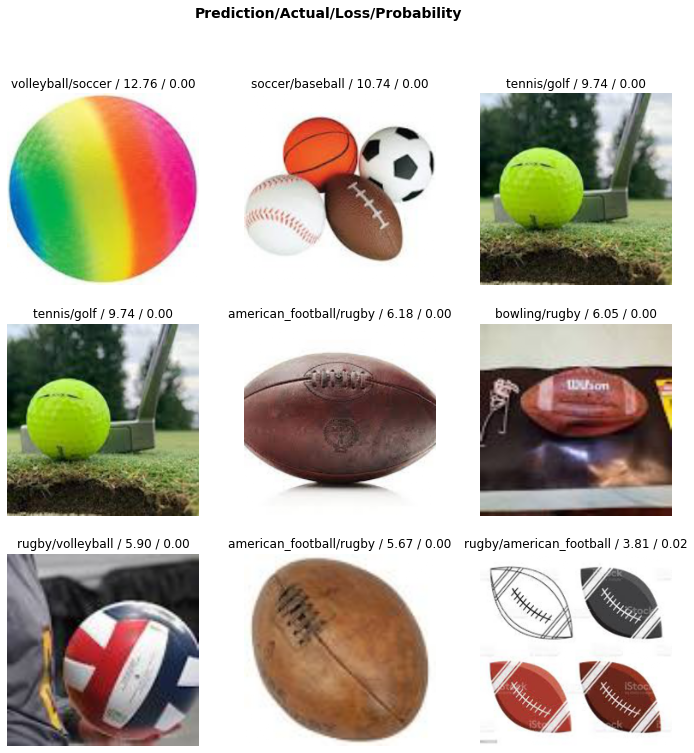

In [34]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(12,12))

# Improved model

In [44]:
# Connect to cleaned dataset

proj_path2 = 'gdrive/My Drive/Image_Classifier/Cleaned_Dataset/Balls/'
p_path2 = Path(proj_path2)

In [45]:
# Generate updated dataset 
np.random.seed(42)
data2 = ImageDataBunch.from_folder(p_path2, train=".", valid_pct=0.2,
        size=224, bs=32).normalize(imagenet_stats)

In [46]:
learn2 = cnn_learner(data2, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [47]:
# train 8 epochs of the model 
learn2.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.075404,1.114669,0.316327,01:23
1,1.845990,0.402457,0.153061,01:23
2,1.222039,0.471048,0.142857,01:26
3,0.846597,0.618555,0.163265,01:24
4,0.622682,0.535425,0.163265,01:24
5,0.475176,0.469439,0.142857,01:24
6,0.364651,0.483365,0.142857,01:24
7,0.295190,0.487868,0.142857,01:24


In [48]:
interp2 = ClassificationInterpretation.from_learner(learn2)

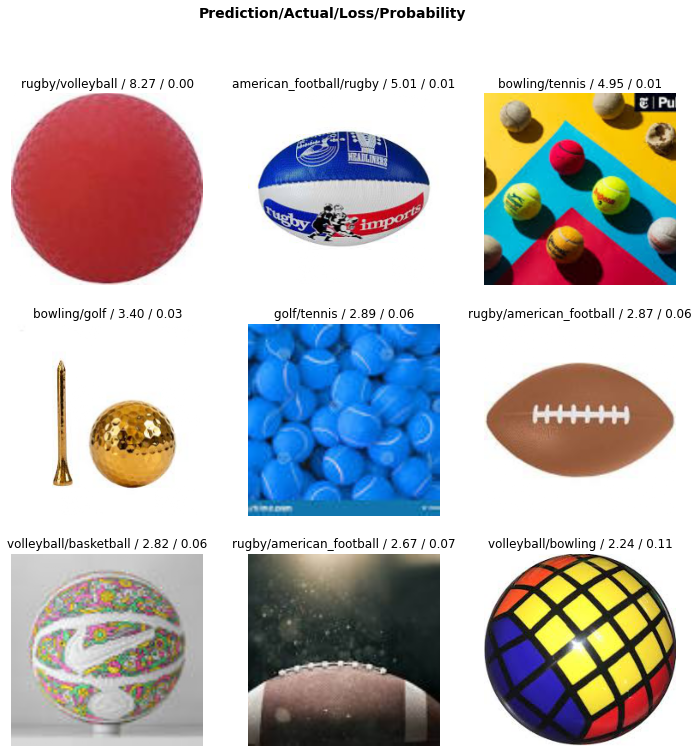

In [49]:
# plot top losses (most wrong)
interp2.plot_top_losses(9, figsize=(12,12))